In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sales=pd.read_excel('Salesdata.xlsx')
sales.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [10]:
sales.shape

(7560, 6)

There are total 6 columns and 7560 rows

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


Here we can see that there are 1 datetime column, 3 categorical columns and 2 numerical columns

In [5]:
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

There is no missing values in this data set


In [7]:
duplicate_rows = sales[sales.duplicated()]

In [8]:
duplicate_rows

,Date,Time,State,Group,Unit,Sales


There is no duplicate rows present

Here looking at the values of unit and sales column we can see there is wide range difference in values so we have to scale them.Here we ose standardization using z score value i.e z=(x-mean)/S.D.

In [11]:
sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


Here we can see both unit and sales are right skewed since their mean is greater than median

In [15]:
grouped = sales.groupby('Group')['Sales'].sum()

In [17]:
high_sales_group=grouped.idxmax()

In [18]:
high_sales_group

' Men'

Group 'Men' has the highest sale

In [19]:
low_sales_group=grouped.idxmin()

In [20]:
low_sales_group

' Seniors'

Group "Seniors" has the lowest sale

In [21]:
state_group=sales.groupby('State')['Sales'].sum()

In [22]:
high_sale_state=state_group.idxmax()

In [23]:
high_sale_state

' VIC'

'VIC' has the highest sale

In [24]:
low_sale_state=state_group.idxmin()

In [25]:
low_sale_state

' WA'

'WA' has the lowest sale

# Weekly,Monthly and Quarterly sales report

In [26]:
# Set the 'Date' column as the index
sales.set_index('Date', inplace=True)

In [28]:
# Generate weekly, monthly, and quarterly reports
weekly_report = sales.resample('W').sum()
monthly_report = sales.resample('M').sum()
quarterly_report = sales.resample('Q').sum()

C:\Users\User\AppData\Local\Temp\ipykernel_9940\51442521.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report = sales.resample('W').sum()
C:\Users\User\AppData\Local\Temp\ipykernel_9940\51442521.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_report = sales.resample('M').sum()
C:\Users\User\AppData\Local\Temp\ipykernel_9940\51442521.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_re

In [29]:
print("Weekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())

Weekly Report:
             Unit     Sales
Date                       
2020-10-04   6018  15045000
2020-10-11  10801  27002500
2020-10-18  10656  26640000
2020-10-25  10726  26815000
2020-11-01   8723  21807500

Monthly Report:
             Unit      Sales
Date                        
2020-10-31  45716  114290000
2020-11-30  36273   90682500
2020-12-31  54132  135330000

Quarterly Report:
              Unit      Sales
Date                         
2020-12-31  136121  340302500


# ○	State-wise sales analysis for different groups (kids, women, men, and seniors) 

<Axes: xlabel='State', ylabel='Sales'>

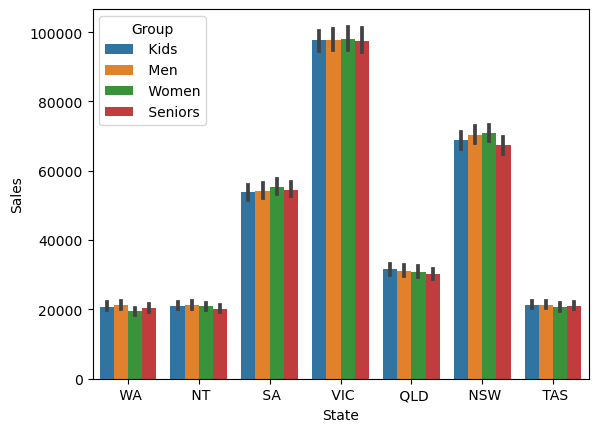

In [32]:
sns.barplot(x='State',y='Sales',hue='Group',data=sales)

# ○	Group-wise sales analysis (kids, women, men, and seniors) across different states.

<Axes: xlabel='Group', ylabel='Sales'>

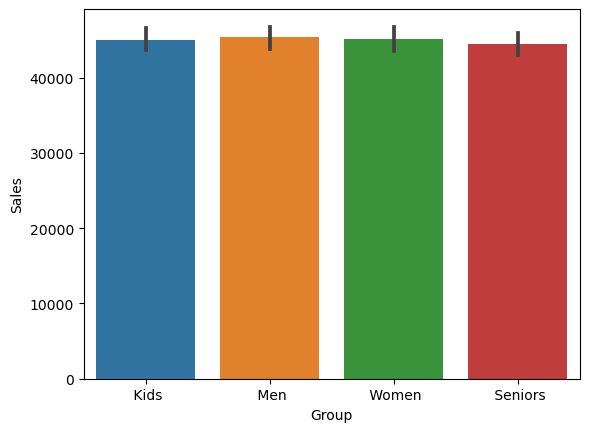

In [33]:
sns.barplot(x='Group',y='Sales',data=sales)

# ○	Time-of-the-day analysis

In [34]:
time_group=sales.groupby('Time')['Sales'].sum()

In [35]:
high_sales_time=time_group.idxmax()

In [36]:
high_sales_time

' Morning'

In [40]:
low_sales_time=time_group.idxmin()

In [41]:
low_sales_time

' Evening'

<Axes: xlabel='Time', ylabel='Sales'>

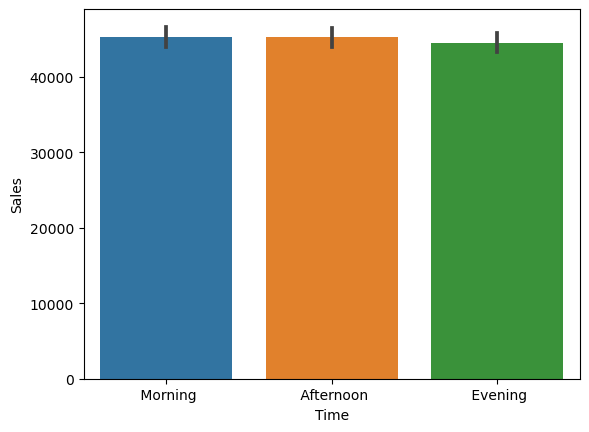

In [44]:

sns.barplot(x='Time',y='Sales',data=sales)